# Lab 3-2: Rank-Sum Test Example
---

Note that the [scipy.stats.ranksums](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html) function should only be used to compare two samples from continuous distributions (i.e. theoretical distributions). It does not handle ties between measurements nor does it apply the continuity correction. For a rank sum test function that can compare discontinuous distribution (i.e. empirical data), handle ties, and apply a continuity correction, use [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

In [1]:
# import libraries we'll need
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the excel file
skykomish_data_file = '../data/Skykomish_peak_flow_12134500_WY1929_2023.xlsx'
skykomish_data = pd.read_excel(skykomish_data_file)
# Preview our data
skykomish_data.head(3)

/opt/conda/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:81: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,date of peak,water year,peak value (cfs),gage_ht (feet)
0,1928-10-09,1929,18800,10.55
1,1930-02-05,1930,15800,10.44
2,1931-01-28,1931,35100,14.08


In [3]:
# Set our alpha and confidence from our prior z-tests
alpha = 0.05
conf = 1 - alpha

# Calculate z_alpha from a normal distribution (from our prior z-tests)
z_alpha = stats.norm.ppf(conf)

In [4]:
# Divide the data into the early period (before 1975) and late period (after and including 1977).
skykomish_before = skykomish_data[ skykomish_data['water year'] < 1977 ] 
skykomish_after = skykomish_data[ skykomish_data['water year'] >= 1977 ] 

---

In this example, we will test the significance of the change in the mean between the two sample periods using the two-sample Rank-Sum test. Read the documentation for [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).

In [5]:
u_rs, p_rs = stats.mannwhitneyu(skykomish_after['peak value (cfs)'], 
                                skykomish_before['peak value (cfs)'],
                                use_continuity=True,
                                alternative="greater")

print("U from stats.mannwhitneyu: {}".format(np.round(u_rs,4)))
print("P from stats.mannwhitneyu: {}".format(np.round(p_rs,4)))

z_rs = stats.norm.ppf(1-p_rs)
print("Z from looking up (1-P): {}".format(np.round(z_rs,4)))

U from stats.mannwhitneyu: 1453.5
P from stats.mannwhitneyu: 0.0041
Z from looking up (1-P): 2.6397


This returns u_mannwhitneyu, the test statistic U presuming this is a large enough sample that this is normally distributed, and p_mannwhitneyu, the one-sided p-value of the test.

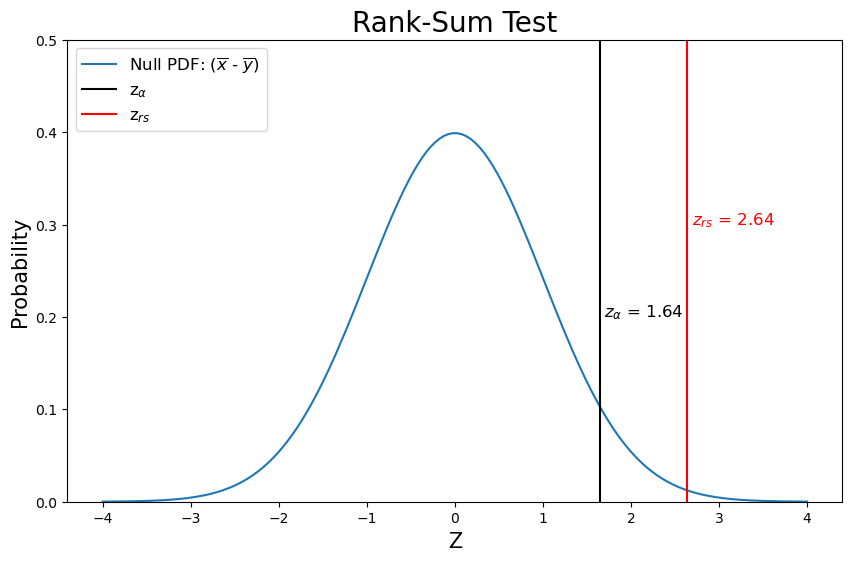

In [6]:
# Make a plot
plt.figure(figsize=(10,6))

# Create values for z
z = np.linspace(-4, 4, num=160)

# Plot the Null PDF
plt.plot(z, stats.norm.pdf(z), label='Null PDF: ($\overline{x}$ - $\overline{y}$)')

# Plot where z_alpha is
plt.axvline(z_alpha, color='black', label=r'z$_\alpha$')
# Add label here with alpha value
plt.text(z_alpha+0.05, 0.2, r'$z_{\alpha}$ = ' + str(round(z_alpha,2)),fontsize=12, color='k')

# Plot z_test by looking up p-value from MannWhitneyU test
plt.axvline(z_rs, color='r', label=r'z$_{rs}$')
# Add label here with z value (by looking up p-value from MannWhitneyU test)
plt.text(z_rs+0.05, 0.3, r'$z_{rs}$ = ' + str(round(z_rs,2)),fontsize=12, color='r')

# Add title, legend, and labels
plt.title('Rank-Sum Test',fontsize=20)
plt.xlabel('Z', fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.ylim(0, 0.5)
plt.legend(loc='upper left',fontsize=12);

**How does our conclusions from the Rank-Sum test compare to our prior two-sample Z-test of the same hypothesis in [Lab 2-1](https://mountain-hydrology-research-group.github.io/data-analysis/modules/module2/lab2-1.html#two-sample-z-test)?** (i.e. compare p-value for the two tests) Only consider the case where the null hypothesis is that no change has occurred.